In [154]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# 1. Read Data

In [155]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [156]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [157]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 missing values in the "Income" column, and given the limited amount of data entries, I propose replacing these null values with the median instead of deleting the corresponding rows. This approach will prevent us from losing any valuable information.

In [158]:
# Replace null values in "Income" column with median
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We also need to encode categorical columns.

In [160]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Marital status and education both have multiple categories that are synonymous. For instance, the terms "Divorced", "Widow", "Alone", "Absurd", and "Yolo" can all be classified as "Single", while "Together" and "Married" can be grouped as "Relationship". 

In [161]:
# Replace "Divorced", "Widow", "Alone", "Absurd", "Yolo" with "Single"
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

# Replace "Together" and "Married" with "Relationship"
data['Marital_Status'] = data['Marital_Status'].replace(['Together','Married'], 'Relationship')

In [162]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Similarly, the designations "2nd Cycle", "Master", and "PhD" can be classified as "Postgraduate", while "Basic" can be categorized as "Undergraduate".

In [163]:
# Replace "Basic" with "Undergraduate"
data['Education'] = data['Education'].replace(['Basic'], 'Undergraduate')

# Replace "2nd Cycle", "Master" and "PhD" with "Postgraduate"
data['Education'] = data['Education'].replace(['2n Cycle', 'Master', 'Graduation','PhD'], 'Postgraduate')

In [164]:
# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()

# Education
label_encoder.fit(data['Education'])
print(list(label_encoder.classes_))
data['Education'] = label_encoder.transform(data['Education'])
print("Education labels: \n", "\t0: %s\n \t1: %s\n" % tuple(label_encoder.inverse_transform([0, 1])))

# Marital_Status
label_encoder.fit(data['Marital_Status'])
print(list(label_encoder.classes_))
data['Marital_Status'] = label_encoder.transform(data['Marital_Status'])
print("Maritial status labels: \n", "\t0: %s\n \t1: %s" % tuple(label_encoder.inverse_transform([0, 1])))

['Postgraduate', 'Undergraduate']
Education labels: 
 	0: Postgraduate
 	1: Undergraduate

['Relationship', 'Single']
Maritial status labels: 
 	0: Relationship
 	1: Single


We can merge the columns KidHome and TeenHome into a new feature called 'Children'.

In [165]:
# Merge Kidhome and Teenhome as Kid
data['Children'] = data['Kidhome'] + data['Teenhome']

# Drop Kidhome and Teenhome
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

Certain variables need to be renamed in order to make their purpose more apparent.

In [166]:
data=data.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})

Let's create "Age" column using birth year.

In [167]:
# Calculate age from birth year
current_year = datetime.datetime.now().year
data["Age"] = current_year - data["Year_Birth"]

Let's also create "Spent" column to indicate total number of amount spent for each customer.

In [168]:
data["Money_Spent"] = data["Wines"] + data["Fruits"] + data["Meat"] + data["Fish"] + data["Sweets"] + data["Gold"]

In [169]:
# Drop unnecessary columns
data.drop(["Z_CostContact", "Z_Revenue", "ID", "Year_Birth", "Dt_Customer"], axis=1, inplace=True)

# 2. Data Analysis

In [170]:
# Some default configs for plots
matplotlib.rcParams['figure.figsize'] = (10, 10)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
binary_pallet = ["#682F2F", "#F3AB60"]
binary_pallet2 = ["#B9C0C9", "#9F8A78"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

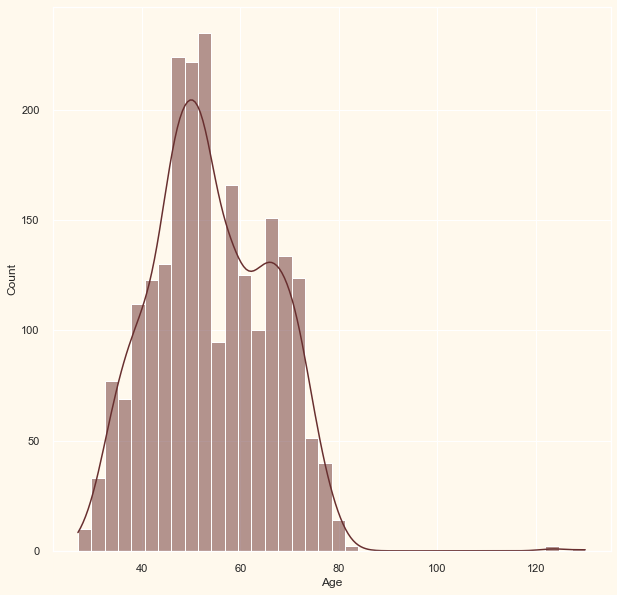

In [171]:
# Let's start our data analysis by looking at the distribution of Age

# Plot the distribution of Age
sns.histplot(data["Age"], kde=True, color="#682F2F")

<AxesSubplot:xlabel='Income', ylabel='Count'>

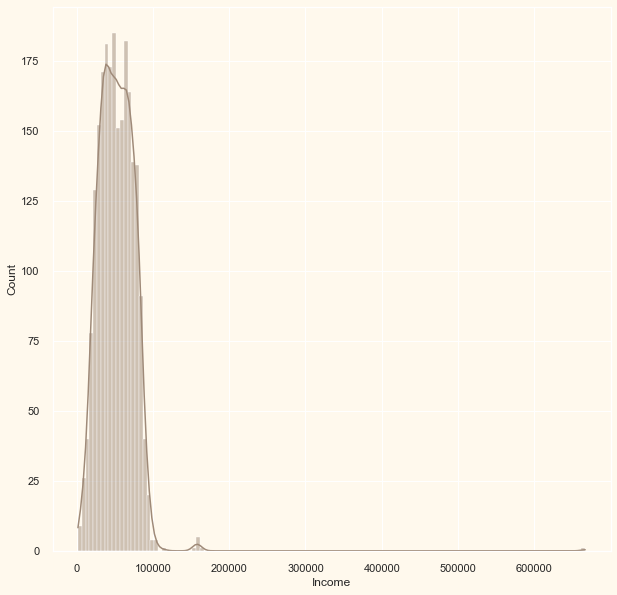

In [172]:
# Let's look at the distribution of Income
sns.histplot(data["Income"], kde=True, color="#9F8A78")

The Age and Income columns contain outliers, which we should eliminate.

In [173]:
# Eliminate rows with income greater than $600K
data = data[data["Income"] < 600000]

# Eliminate rows with age more than 85
data = data[data["Age"] < 90]

In [174]:
data.shape

(2236, 25)

Let's explore the correlation between the different features.

<AxesSubplot:>

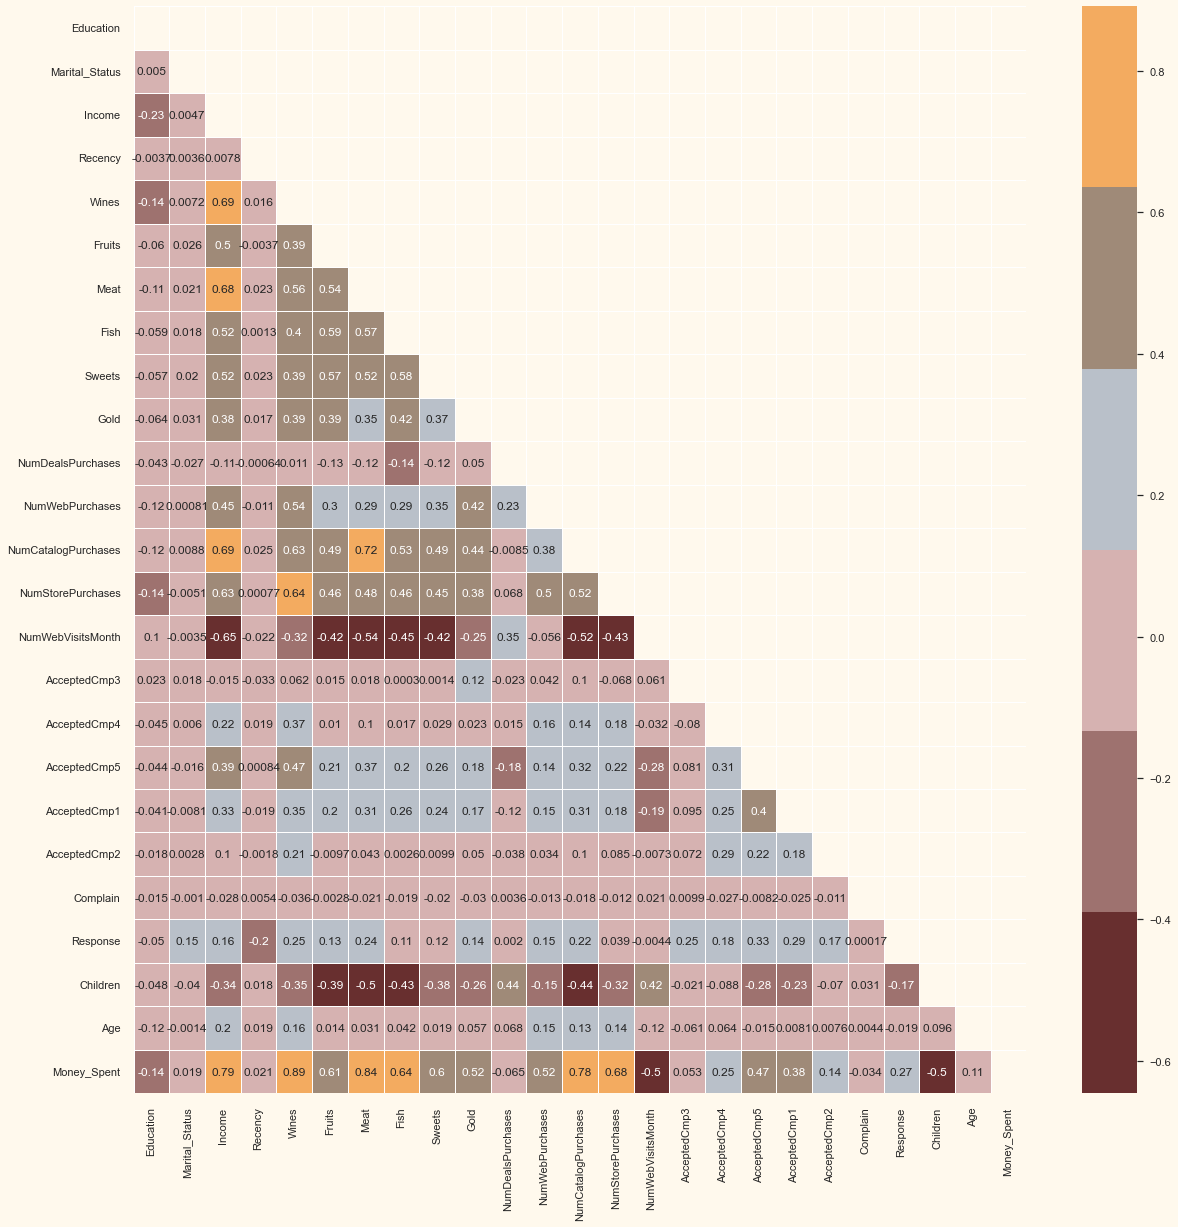

In [175]:
# Mask for upper triangle
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, mask=mask, cmap=cmap, linewidths=1, linecolor="white")

- As expected, there is a correlation between income and purchases of wine and meat.
- Wine is typically bought from retail stores.
- Catalogs are a common source for purchasing meat.

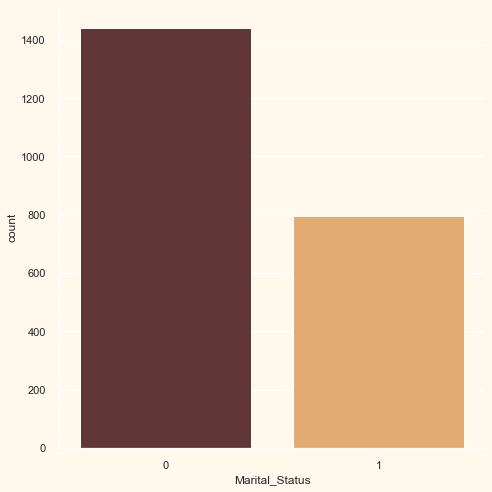

In [176]:
# Marital status counts
sns.catplot(x="Marital_Status", kind="count",data=data, height=7, aspect=1, palette=binary_pallet)

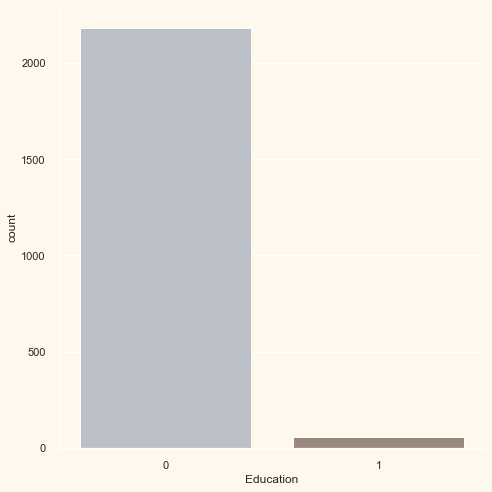

In [177]:
# Education counts
sns.catplot(x="Education", kind="count",data=data, height=7, aspect=1, palette=binary_pallet2)

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

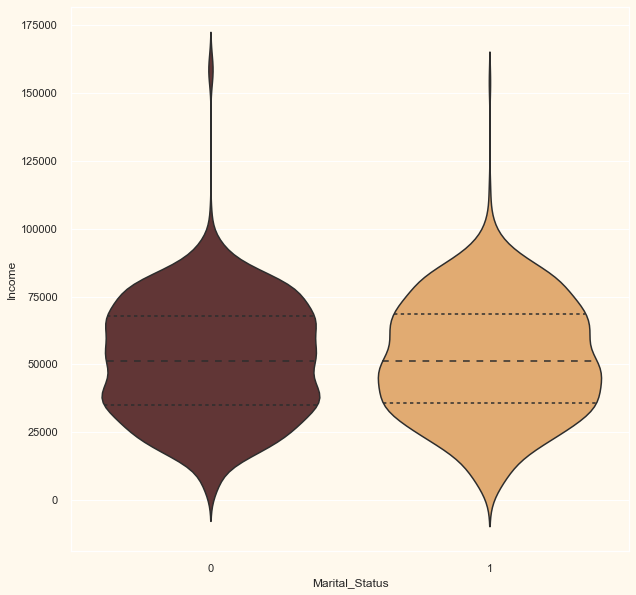

In [178]:
# Income distribution by Marital Status
sns.violinplot(x="Marital_Status", y="Income", data=data, inner="quartile", palette=binary_pallet)

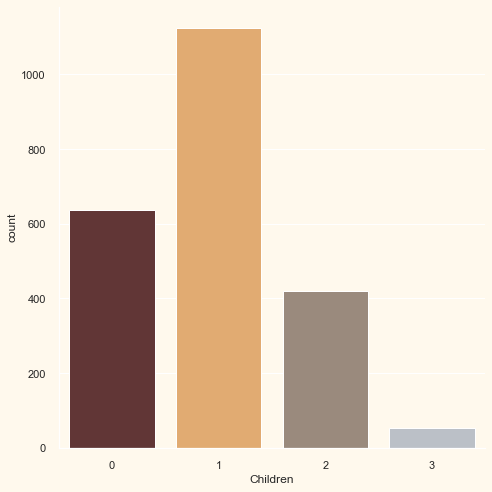

In [179]:
# Children counts
sns.catplot(x="Children", kind="count",data=data, height=7, aspect=1, palette=["#682F2F", "#F3AB60", "#9F8A78", "#B9C0C9"])

In [180]:
# Let's see percentages
data['Children'].value_counts(normalize=True) * 100

1    50.313059
0    28.488372
2    18.828265
3     2.370304
Name: Children, dtype: float64

- The age range of our dataset's customers spans from 27 to 130 years old, with an average age of 54.
- Our dataset includes individuals with incomes ranging from $1.7K to $666K , with an average income of $52K.
- When comparing the income statistics of single individuals and those in relationships within our dataset, we observe that the distributions are quite similar, with quartiles and mean values being close. However, those in relationships have some significant outliers.
- Our dataset comprises over 1400 individuals in relationships and approximately 800 single individuals.
- Nearly all customers in our dataset have completed postgraduate education, with only a small minority having completed undergraduate studies.
- The minimum number of children that customers have in our dataset is 0, while the maximum is 3, and the mean is 1. Additionally, individuals with one child make up 50.35% of the dataset, those with no children make up 28.48%, those with two children comprise 18.79%, and those with three children make up 2.36%.

0    99.105546
1     0.894454
Name: Complain, dtype: float64

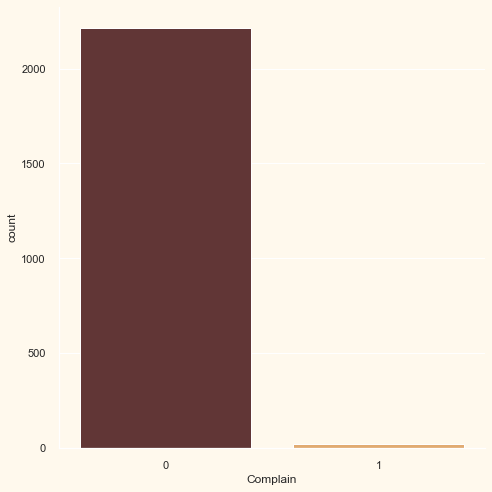

In [181]:
# Let's continue with analyzing complains
sns.catplot(x="Complain", kind="count",data=data, height=7, aspect=1, palette=binary_pallet)
# Percentage of complains
data['Complain'].value_counts(normalize=True) * 100

Approximately 1% of the customers have filed complaints thus far, which is a positive development! However, there is still room for improvement in reducing the number of complaints. Let's examine which category the customers who filed complaints spend the most time in.

Wines     45.076531
Fruits     6.403061
Meat      30.025510
Fish       6.811224
Sweets     4.642857
Gold       7.040816
dtype: float64


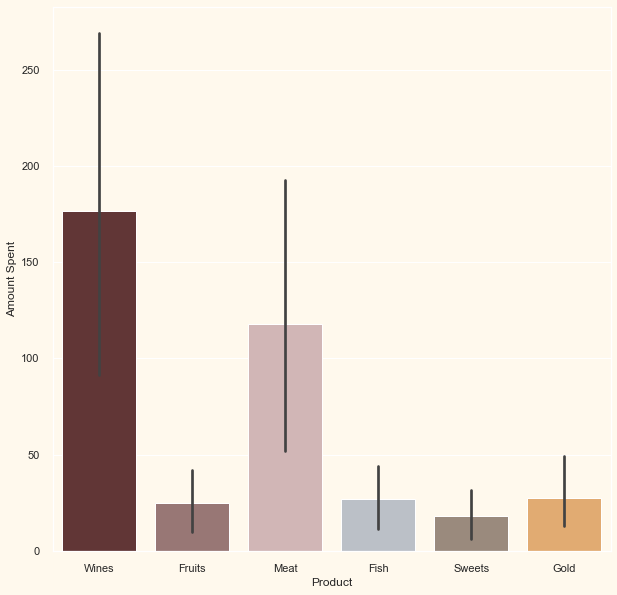

In [182]:
# Create a subset DataFrame with only the columns of interest
subset_df = data[['Complain', 'Age', 'Marital_Status', 'Children','Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]

# Filter the subset DataFrame to only include customers who have filed complaints
complained_df = subset_df[subset_df['Complain'] == 1]

# Reshape
melted_df = complained_df.melt(id_vars=['Complain'], var_name='Product', value_name='Amount Spent', value_vars=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
sns.barplot(x='Product', y='Amount Spent', data=melted_df, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Calculate the percentage of time spent on each product by customers who have filed complaints
total_time_spent = complained_df.drop(['Age', 'Marital_Status', 'Children'], axis=1).sum()[1:]
percentages = (total_time_spent / total_time_spent.sum()) * 100
print(percentages)


Based on the findings, 44.89% of the individuals who lodged a complaint primarily spent their money on wines, while 29.87% focused on meats, and approximately 6.5% allocated their money to fruits, fish, sweets, and luxury items. Consequently, it can be inferred that if the company targets the grievances related to the wine and meat departments, the complaints could decrease by approximately 75%.

We can determine the distribution of customer ages who have filed complaints.

<AxesSubplot:xlabel='Age', ylabel='Count'>

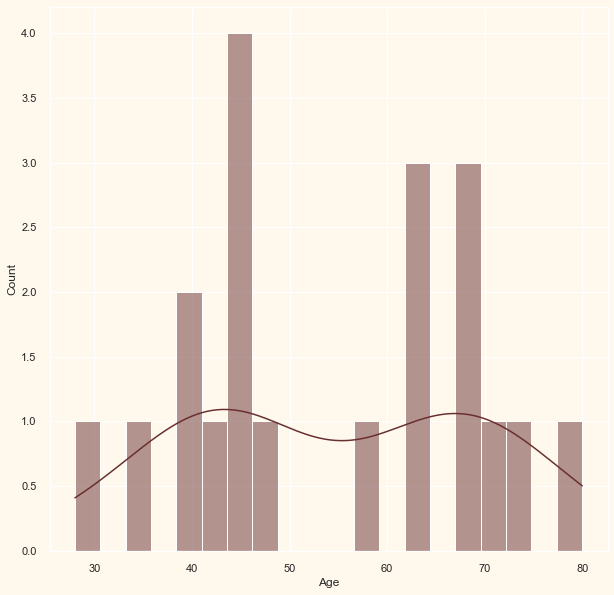

In [183]:
# Age distribution of the customers who have complaint
sns.histplot(complained_df["Age"], kde=True, bins=20, color="#682F2F")

The majority of the customers who filed complaints are in the age range of 40-70. The company should prioritize its focus on customers within this age range.

Let's find out the marital status of the customers who have complaint.

0    65.0
1    35.0
Name: Marital_Status, dtype: float64

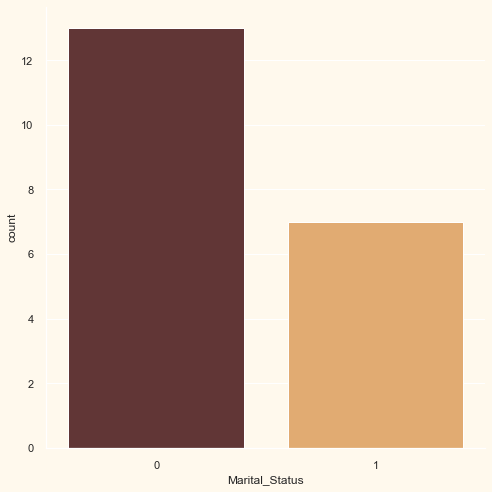

In [184]:
sns.catplot(x="Marital_Status", kind="count",data=complained_df, height=7, aspect=1, palette=binary_pallet)

#Percentages of marital status of the customers who have complaint
complaint_counts = complained_df['Marital_Status'].value_counts()
total_complaints = len(complained_df)
marital_status_percentages = (complaint_counts / total_complaints) * 100
marital_status_percentages

According to our analysis, 61.9% of the customers who have filed complaints are in a relationship, while 38.09% are single. The company could potentially focus on targeting customers who are in a relationship based on these findings.

I am curious about whether the customers who filed a complaint have children, and if so, how many children they have. 

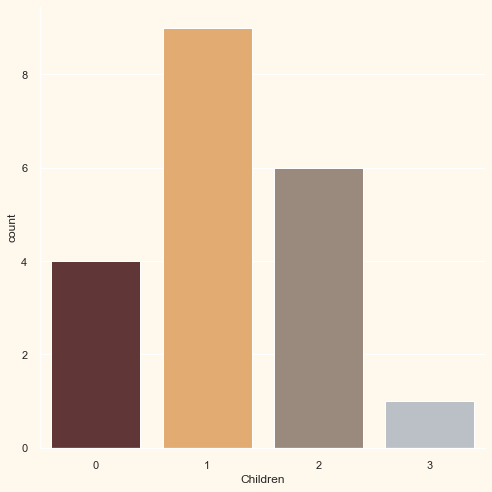

In [185]:
sns.catplot(x="Children", kind="count",data=complained_df, height=7, aspect=1, palette=["#682F2F", "#F3AB60", "#9F8A78", "#B9C0C9"])

 It appears that approximately 20% of the complaining customers do not have any children, while the remaining 80% have at least one child. The company may want to investigate any issues related to products for children to identify potential reasons why customers are filing complaints.

We should examine whether customers who file complaints prefer shopping online or in physical stores.

In [186]:
# Subset DataFrame with only the columns of interest
subset_df = data[['Complain', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Filter 
complained_df = subset_df[subset_df['Complain'] == 1]

# Melt the dataframe
melted_df = complained_df.melt(id_vars=['Complain'], var_name='Purchase Channel', value_name='Number of Purchases', value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])

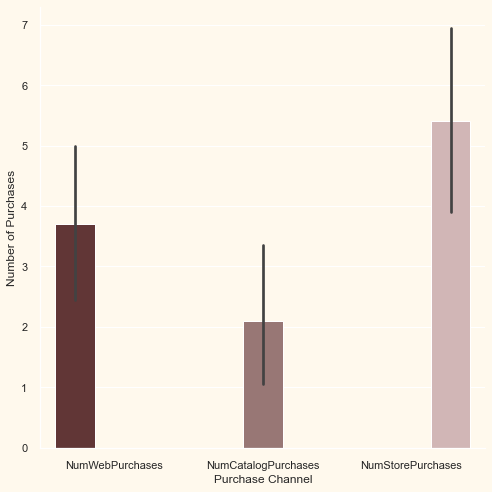

In [187]:
sns.catplot(x='Purchase Channel', y='Number of Purchases', hue='Purchase Channel', data=melted_df, kind='bar', height=7, aspect=1, palette=["#682F2F", "#9E726F", "#D6B2B1"])

It appears that the frequency of complaints is higher for in-store purchases than for online and catalog purchases.

Our analysis of customer complaints is now complete. Let's shift our focus to other inquiries and work towards finding answers for them.

We can start with distribution of the total amount spent.

/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Money_Spent', ylabel='Density'>

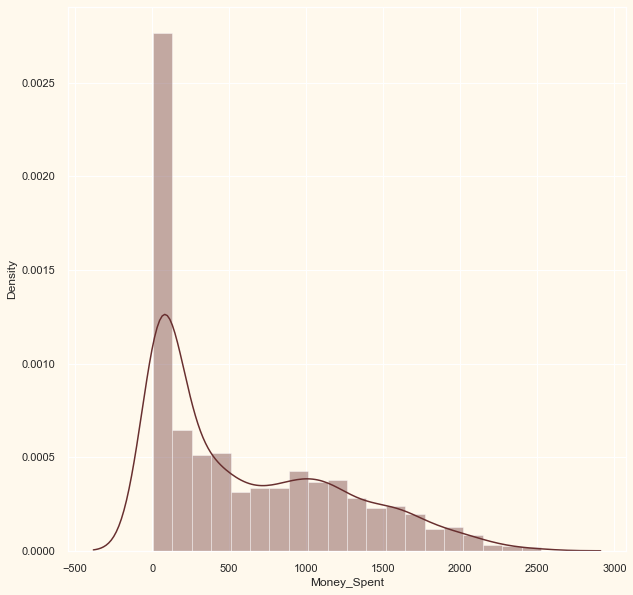

In [188]:
sns.distplot(data['Money_Spent'], color="#682F2F", kde=True, bins=20)

Let's categorize customers based on their total expenditure.

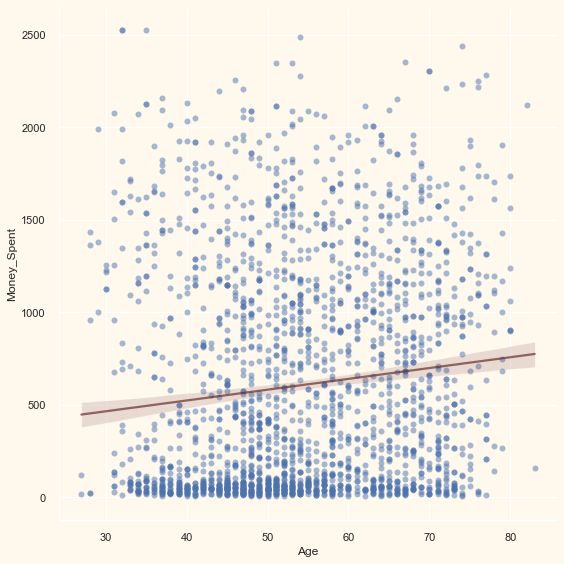

In [189]:
# Spend distribution according to the age
sns.lmplot(x="Age", y="Money_Spent", data=data, palette="Set2", height=8, aspect=1, line_kws={'color': '#682F2F', 'alpha':0.7}, scatter_kws={'alpha':0.5})

As observed, the total expenditure tends to increase with age.

<AxesSubplot:xlabel='Children', ylabel='Money_Spent'>

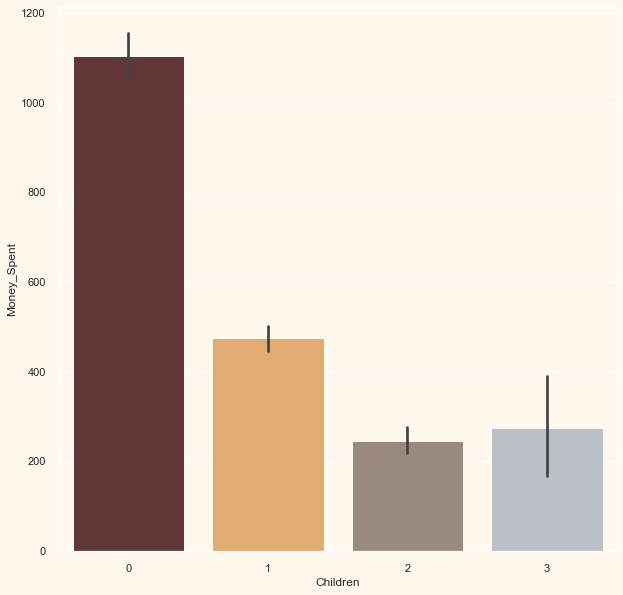

In [190]:
# Spend distribution according to the number of Kids customers have
sns.barplot(x="Children", y="Money_Spent", data=data, palette=["#682F2F", "#F3AB60", "#9F8A78", "#B9C0C9"])

The customers without children have the highest expenditure.

# 3. Clustering Customers

We possess an excessive number of features, and a significant proportion of them are duplicative. Hence, we can utilize dimensionality reduction methods to simplify our classifier's task.
To accomplish this, we could implement Principal Component Analysis (PCA) to diminish the number of dimensions in our dataset.

Before that, let's scale the data.

In [192]:
scaler = StandardScaler()
scaled_data = data.copy()
num_cols = ["Income", "Recency", "Wines", "Fruits", 
            "Meat", "Fish", "Sweets","Gold", 
            "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", 
            "NumStorePurchases", "NumWebVisitsMonth", "Money_Spent", "Age"]

scaled_data[num_cols] = scaler.fit_transform(scaled_data[num_cols])

Let's determine how many components we should select for dimensionality reduction.

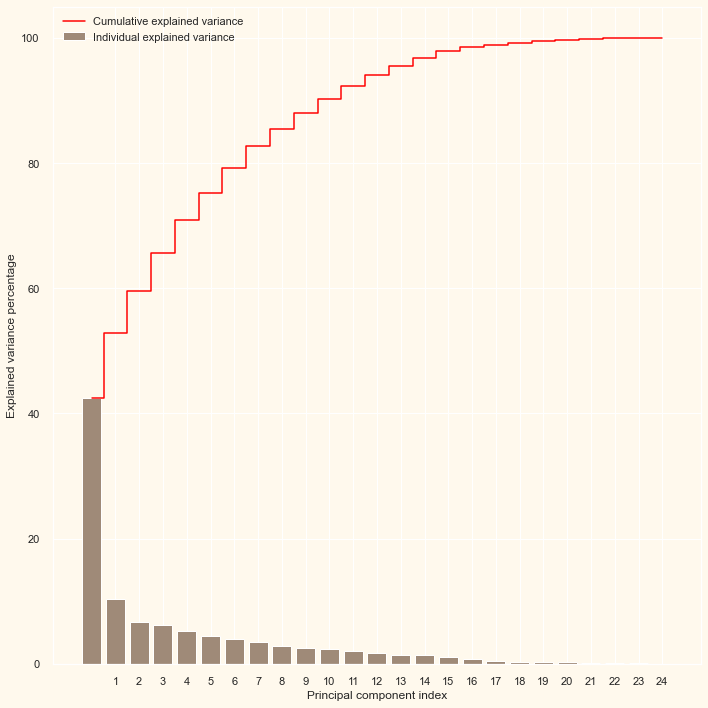

In [194]:
pca = PCA(n_components=None)
pca.fit(scaled_data)

# Plotting the cumulative sum of the explained variance ratio
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(0, data.shape[1]), exp_var, align='center',
        label='Individual explained variance', color="#9F8A78")

plt.step(range(0, data.shape[1]), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
# define ticks
plt.xticks(np.arange(1, data.shape[1], 1.0))
plt.legend(loc='best')
plt.tight_layout()

Seems like first three principal components capture approximately %60 of the variance in our data. Let's start with 3 principal components.

In [195]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

X = pd.DataFrame(pca.transform(scaled_data), columns=['PC1', 'PC2', 'PC3'])

Now we need to determine the number of clusters for our data. We can use Elbow method for this purpose.

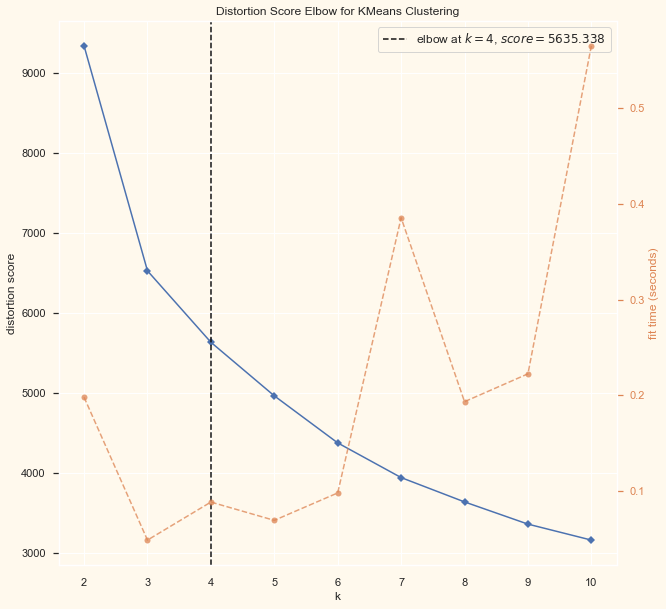

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [196]:
elbow_visualizer = KElbowVisualizer(KMeans(), k=10)

elbow_visualizer.fit(X)
elbow_visualizer.show()

We can see that Elbow occurs at k = 4. This means that optimal number for the number of clusters is 4.

In [197]:
kmeans = KMeans(n_clusters=4, random_state=42)
preds = kmeans.fit_predict(X)

In [198]:
import plotly.express as px
# Plot the clusters in 3D
print("Total explained variance: ", pca.explained_variance_ratio_.sum())
fig = px.scatter_3d(X, x='PC1', y='PC2', z='PC3',
                color=preds)
fig.show()

Total explained variance:  0.5950986396017534


Using the first three components, we were able to capture approximately %60 of the data. Also, we successfully clustered our data into 4 clusters.
Now, we can apply PCA with 7 components, as such corresponds approximately %80 variance.

In [199]:
# Let's apply PCA
pca = PCA(n_components=7)
pca.fit(scaled_data)

X = pd.DataFrame(pca.transform(scaled_data), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

Again, we will use the elbow method to find the optimal number of clusters.

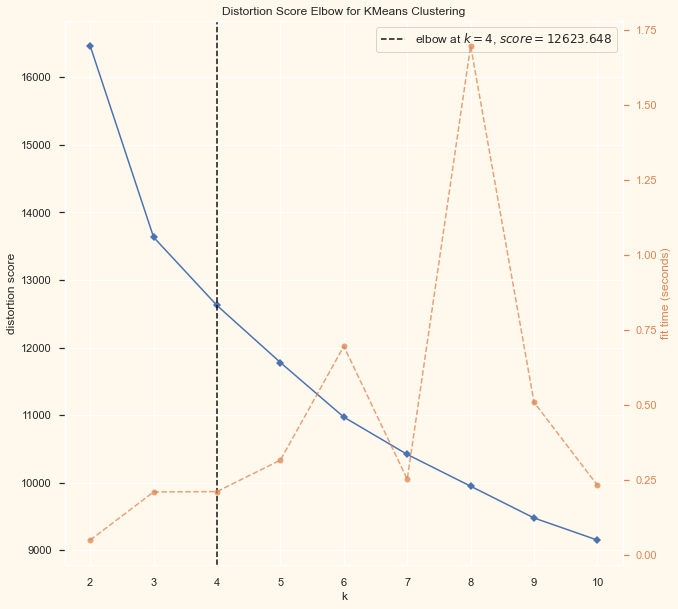

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [200]:
elbow_visualizer = KElbowVisualizer(KMeans(), k=10)

elbow_visualizer.fit(X)
elbow_visualizer.show()

It seems like optimal number of clusters is 4 again.

In [201]:
print("Total explained variance: ", pca.explained_variance_ratio_.sum())

Total explained variance:  0.7916330125181589


In [202]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X)

data["Clusters"] = predictions

## Customer Segmentation

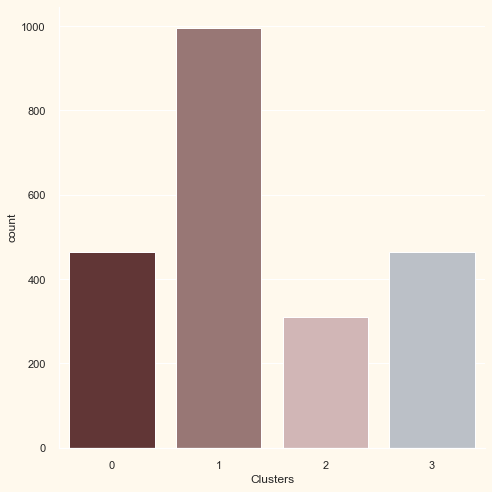

In [203]:
# Plot cluster frequencies
sns.catplot(x="Clusters", kind="count",data=data, height=7, aspect=1, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

Cluster 1 has the largets, and cluster 2 is the smallest.

<AxesSubplot:xlabel='Clusters', ylabel='Income'>

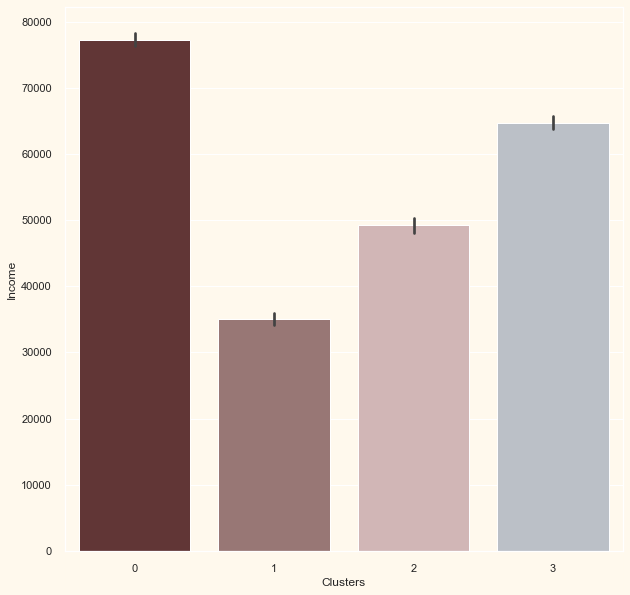

In [204]:
# Cluster vs Income
sns.barplot(x="Clusters", y="Income", data=data, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

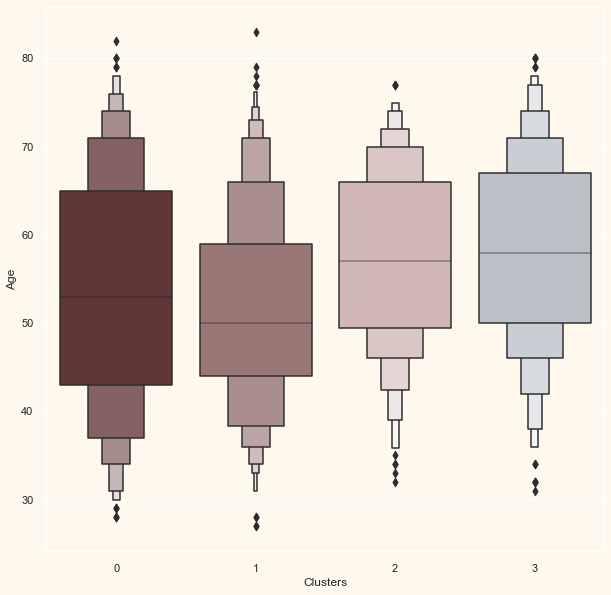

In [208]:
# Cluster vs Age
sns.boxenplot(x="Clusters", y="Age", data=data, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

<AxesSubplot:xlabel='Income', ylabel='Money_Spent'>

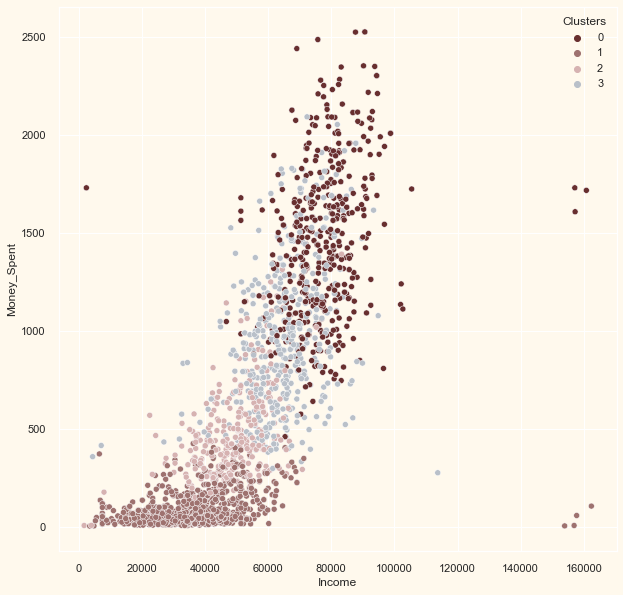

In [206]:
# Income vs Money Spent
sns.scatterplot(x="Income", y="Money_Spent", data=data, hue="Clusters", palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

<AxesSubplot:xlabel='Children', ylabel='Clusters'>

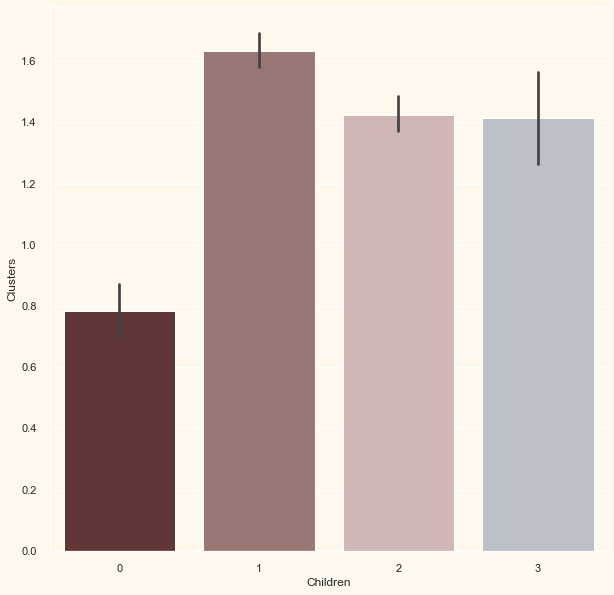

In [212]:
# Children vs clusters
sns.barplot(x="Children", y="Clusters", data=data, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

<AxesSubplot:xlabel='Clusters', ylabel='NumDealsPurchases'>

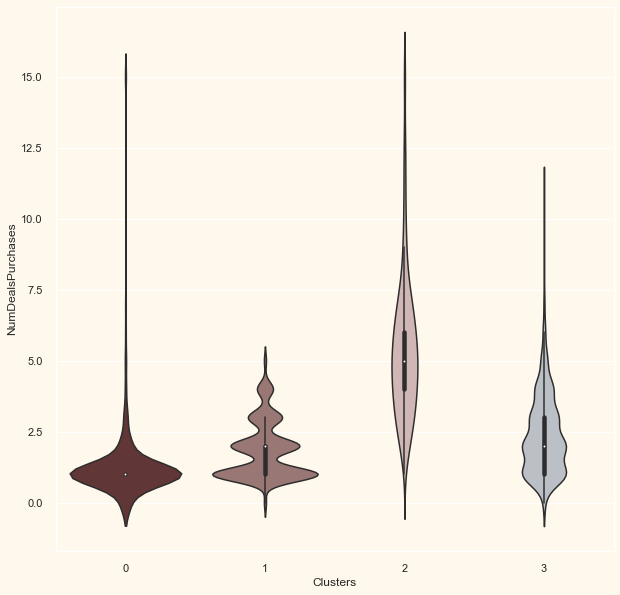

In [221]:
# Clusters vs Store Purchases
sns.violinplot(x="Clusters", y="NumDealsPurchases", data=data, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

<AxesSubplot:xlabel='Clusters', ylabel='NumStorePurchases'>

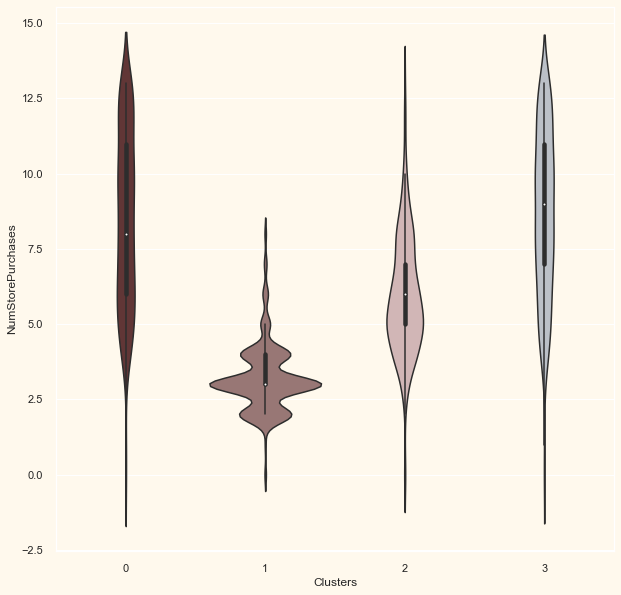

In [223]:
# Clusters vs store purchases
sns.violinplot(x="Clusters", y="NumStorePurchases", data=data, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

<AxesSubplot:xlabel='Clusters', ylabel='NumWebPurchases'>

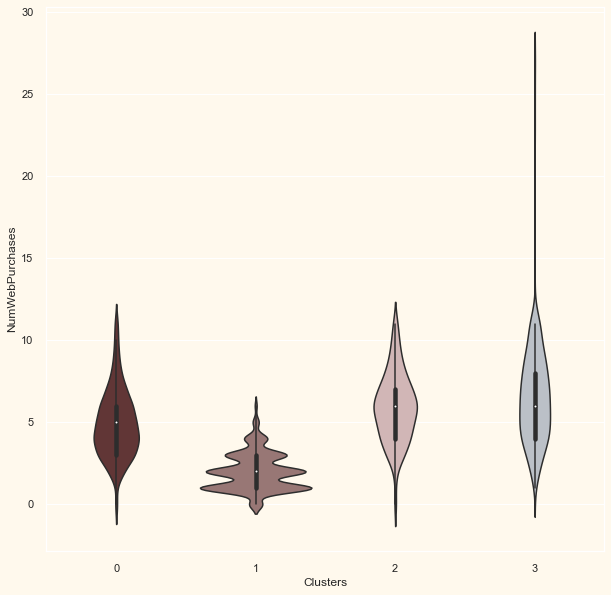

In [222]:
# Clusters vs Web Purchases
sns.violinplot(x="Clusters", y="NumWebPurchases", data=data, palette=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])

### Observations

**Cluster 0:**
- Highest income individuals
- Highest income and high money spent
- Middle-aged individuals (~52)
- No children
- Least number of discount purchases
- Likes both in-store and online shopping

**Cluster 1:**
- Majority class
- Low-income individuals
- Low income and low money spent
- Many children
- Prefers shopping in stores and do not shop online

**Cluster 2:**
- Minority class
- Average income individuals and average money spent
- Has children
- Makes the most discount purchases
- Loves shops and online shopping

**Cluster 3:**
- High income individuals and high money spent
- Has children
- Prefer shopping in stores

### Marketing strategies

**Cluster 0:**

Focus on providing high-end products and luxury services that cater to the interests of this group.
Use a mix of online and offline marketing channels to reach out to these customers and offer them exclusive discounts and deals.
Create a loyalty program that rewards customers for their frequent visits and purchases.
Leverage social media platforms like Instagram and Facebook to showcase the brand's products and services and promote engagement with this group of customers.

**Cluster 1:**

Offer budget-friendly products that appeal to the family-oriented nature of this group.
Create campaigns that showcase how the brand's products can meet the needs of busy parents who need to balance work and family life.
Use traditional marketing channels like TV ads and flyers to reach out to this group of customers who prefer not to shop online.

**Cluster 2:**

Offer a variety of products that cater to the different needs of families with children.
Highlight the value of the brand's products and services, especially the discounts and deals that this group is interested in.
Use online and offline marketing channels to reach out to this group and showcase the brand's products.
Create a referral program that rewards customers who refer friends and family to the brand.

**Cluster 3:**

Create in-store experiences that cater to families with children and provide convenience for busy parents.
Consider partnering with parenting blogs or influencers to promote the brand's products to this group.